In [7]:
import numpy as np

results = np.load("/home/vhsingh/openfoam10-run/Geo-UPSplus/dataset_gen/CE-Gauss_openfoam/CE-Gauss_results.npy")

print(results.shape)

(1000, 21, 4, 128, 128)


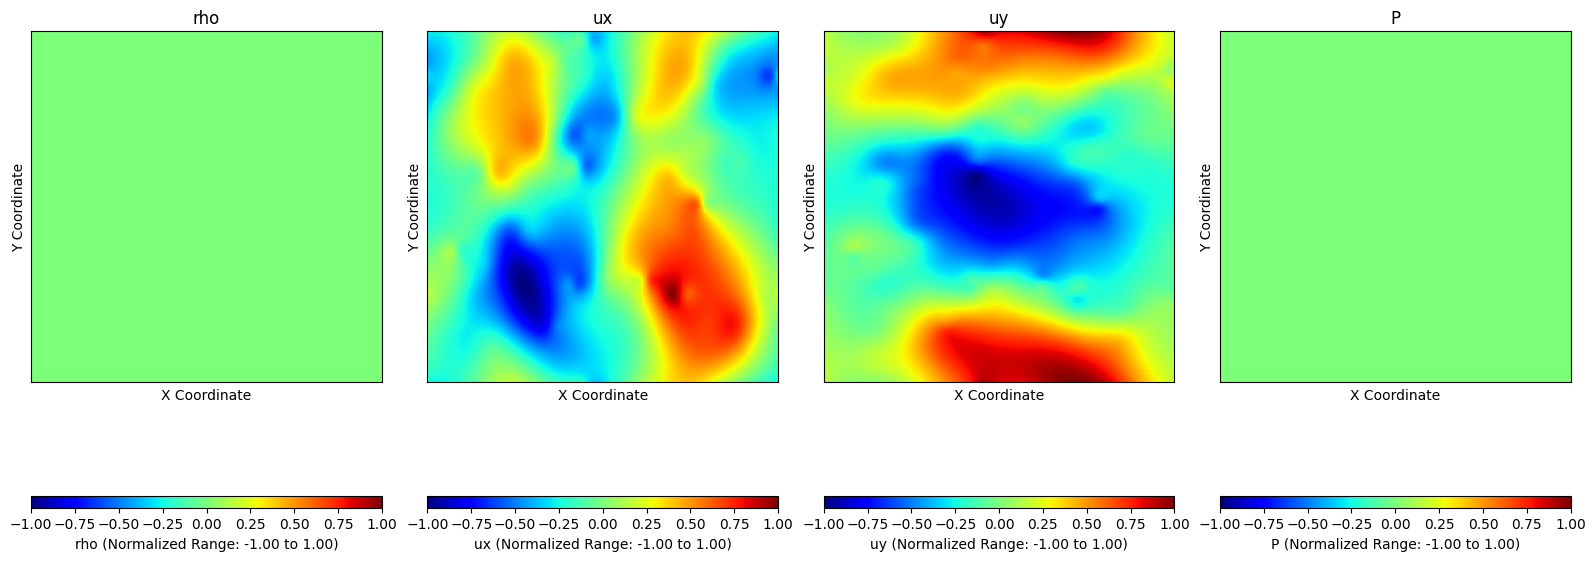

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the data for the first simulation and first timestep
# Assuming `results` is the array with shape (simulations, timesteps, channels, N, N)
data = results[1, 0, :, :, :]  # Shape: (4, 128, 128), where 4 is the number of channels

# Names for the plots
channel_names = ['rho', 'ux', 'uy', 'P']

# Create the figure
fig, axes = plt.subplots(1, len(channel_names), figsize=(16, 6))

# Choose a more vibrant, multi-hued colormap (e.g., 'jet', 'hsv', 'turbo', 'prism')
cmap_choice = 'jet'

# Normalization function: scale to [-1, 1]
def normalize_field(field):
    field_min = np.min(field)
    field_max = np.max(field)
    if field_max - field_min == 0:
        # If all values are the same, set the normalized field to 0
        return np.zeros_like(field)
    return 2 * (field - field_min) / (field_max - field_min) - 1

# Loop through each channel and create plots
for i, name in enumerate(channel_names):
    ax = axes[i]

    # Normalize the field
    normalized_data = normalize_field(data[i, :, :])

    # Determine vmin and vmax after normalization
    vmin, vmax = -1, 1  # Normalized range is always [-1, 1]

    # Plot the heatmap with the chosen colormap
    im = ax.imshow(normalized_data, cmap=cmap_choice, origin='lower', vmin=vmin, vmax=vmax)
    ax.set_title(name)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Add a colorbar below the plot
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, aspect=30)
    cbar.set_label(f'{name} (Normalized Range: {vmin:.2f} to {vmax:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()



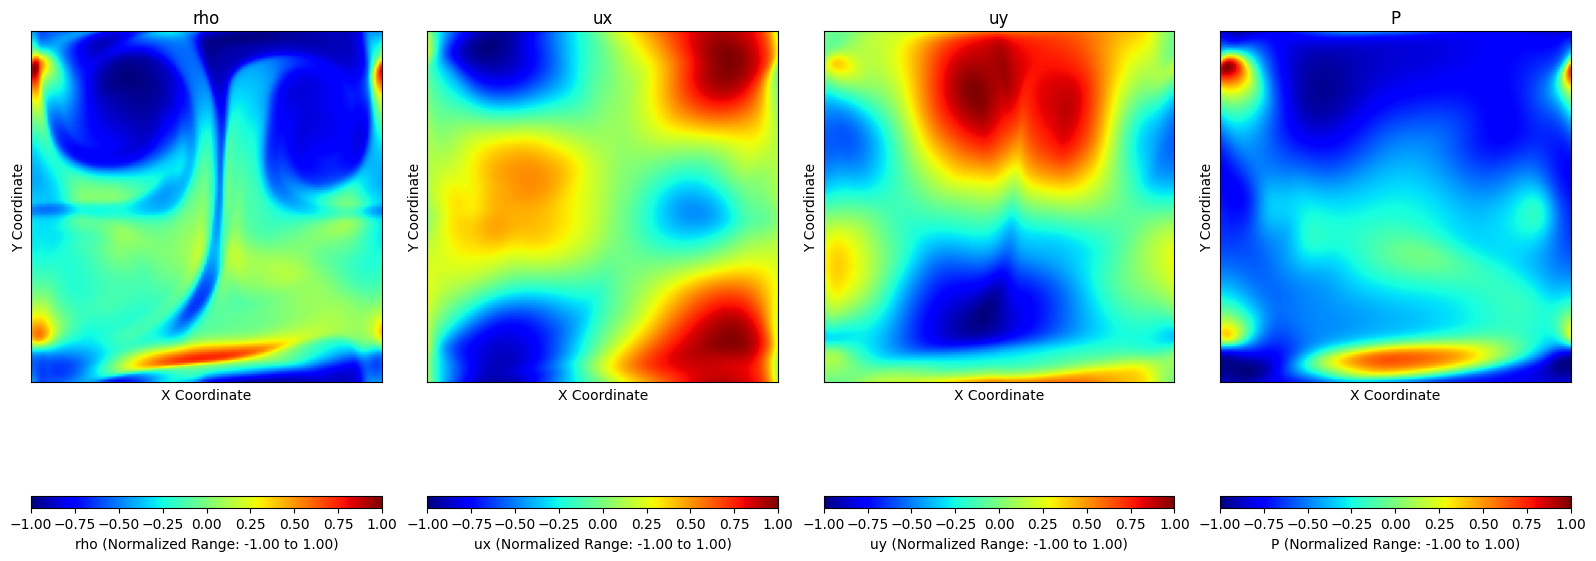

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the data for the first simulation and first timestep
# Assuming `results` is the array with shape (simulations, timesteps, channels, N, N)
data = results[1, 20, :, :, :]  # Shape: (4, 128, 128), where 4 is the number of channels

# Names for the plots
channel_names = ['rho', 'ux', 'uy', 'P']

# Create the figure
fig, axes = plt.subplots(1, len(channel_names), figsize=(16, 6))

# Choose a more vibrant, multi-hued colormap (e.g., 'jet', 'hsv', 'turbo', 'prism')
cmap_choice = 'jet'

# Normalization function: scale to [-1, 1]
def normalize_field(field):
    field_min = np.min(field)
    field_max = np.max(field)
    if field_max - field_min == 0:
        # If all values are the same, set the normalized field to 0
        return np.zeros_like(field)
    return 2 * (field - field_min) / (field_max - field_min) - 1

# Loop through each channel and create plots
for i, name in enumerate(channel_names):
    ax = axes[i]

    # Normalize the field
    normalized_data = normalize_field(data[i, :, :])

    # Determine vmin and vmax after normalization
    vmin, vmax = -1, 1  # Normalized range is always [-1, 1]

    # Plot the heatmap with the chosen colormap
    im = ax.imshow(normalized_data, cmap=cmap_choice, origin='lower', vmin=vmin, vmax=vmax)
    ax.set_title(name)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Add a colorbar below the plot
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, aspect=30)
    cbar.set_label(f'{name} (Normalized Range: {vmin:.2f} to {vmax:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()



Done 0


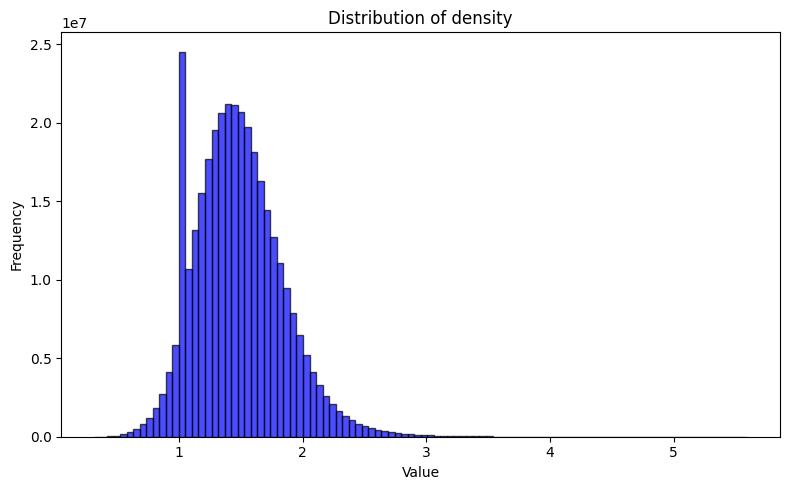

Done density
Done 1


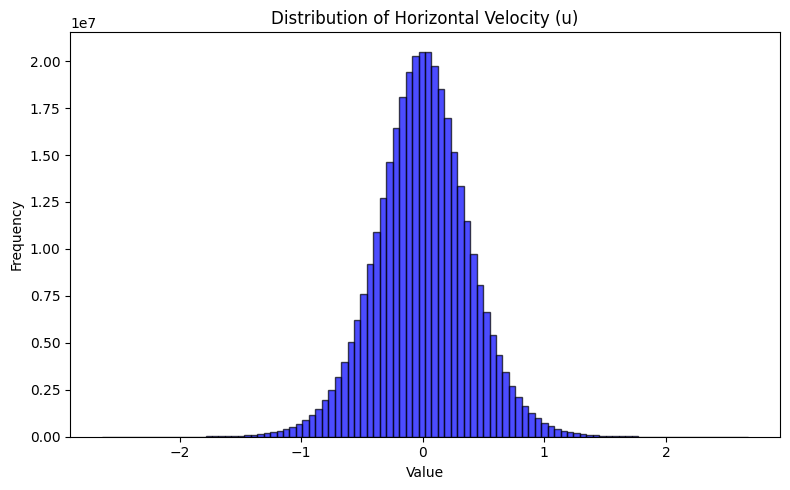

Done Horizontal Velocity (u)
Done 2


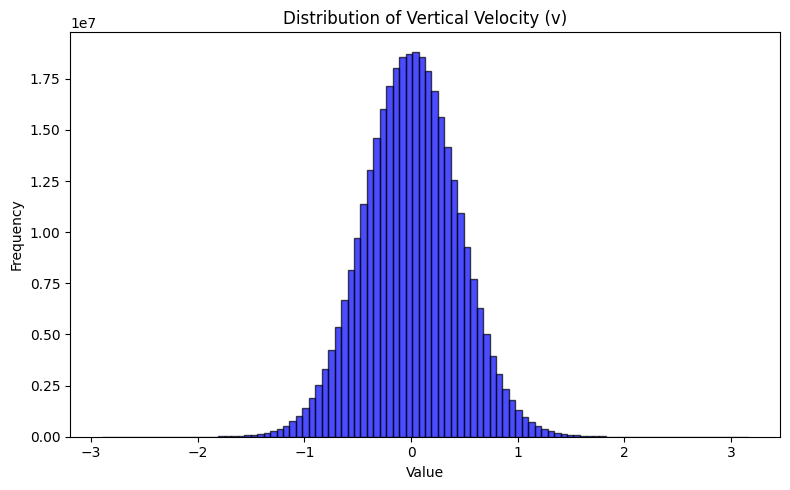

Done Vertical Velocity (v)
Done 3


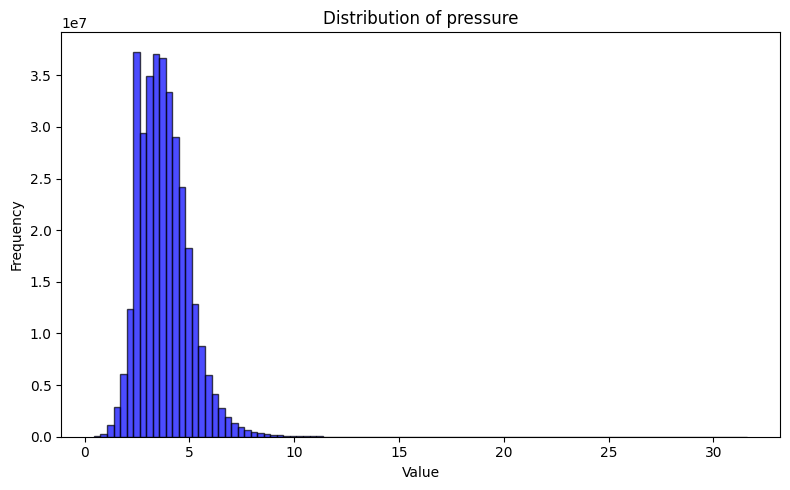

Done pressure
                             mean       std       min        max  \
density                  1.476307  0.358119  0.311602   5.595317   
Horizontal Velocity (u)  0.000359  0.385321 -2.637151   2.673493   
Vertical Velocity (v)    0.002103  0.438482 -2.894177   3.155810   
pressure                 3.777153  1.191633  0.441033  31.625000   

                         25th_percentile    median  75th_percentile  
density                         1.224178  1.450031         1.690987  
Horizontal Velocity (u)        -0.241279  0.000294         0.242133  
Vertical Velocity (v)          -0.292155  0.002260         0.295619  
pressure                        2.903680  3.648590         4.468100  


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Compute statistics for each channel
channel_names = ['density','Horizontal Velocity (u)', 'Vertical Velocity (v)', 'pressure']
stats = {}

for i, channel_name in enumerate(channel_names):
    channel_data = results[:, :, i, :, :].flatten()  # Flatten data for statistics
    channel_stats = {
        'mean': np.mean(channel_data),
        'std': np.std(channel_data),
        'min': np.min(channel_data),
        'max': np.max(channel_data),
        '25th_percentile': np.percentile(channel_data, 25),
        'median': np.median(channel_data),
        '75th_percentile': np.percentile(channel_data, 75)
    }
    stats[channel_name] = channel_stats
    print(f'Done {i}')

    # Plot histogram for the channel using matplotlib
    plt.figure(figsize=(8, 5))
    plt.hist(channel_data, bins=100, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {channel_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print(f'Done {channel_name}')

# Display statistics
stats_df = pd.DataFrame(stats).T  # Transpose to view channels as rows
print(stats_df)
